In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

carichiamo i dati

In [10]:
df= pd.read_csv("../data/processed/dataset_features.csv")

X= df.drop(columns=['Target'])
y = df['Target']

#Train-Test Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Inizializziamo i modelli**: usiamo class_weight='balanced' per tutti i modelli per gestire lo sbilanciamento

In [12]:
modelli = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

## Addestramento e Valutazione

--- CONFRONTO MODELLI DI MACHINE LEARNING ---



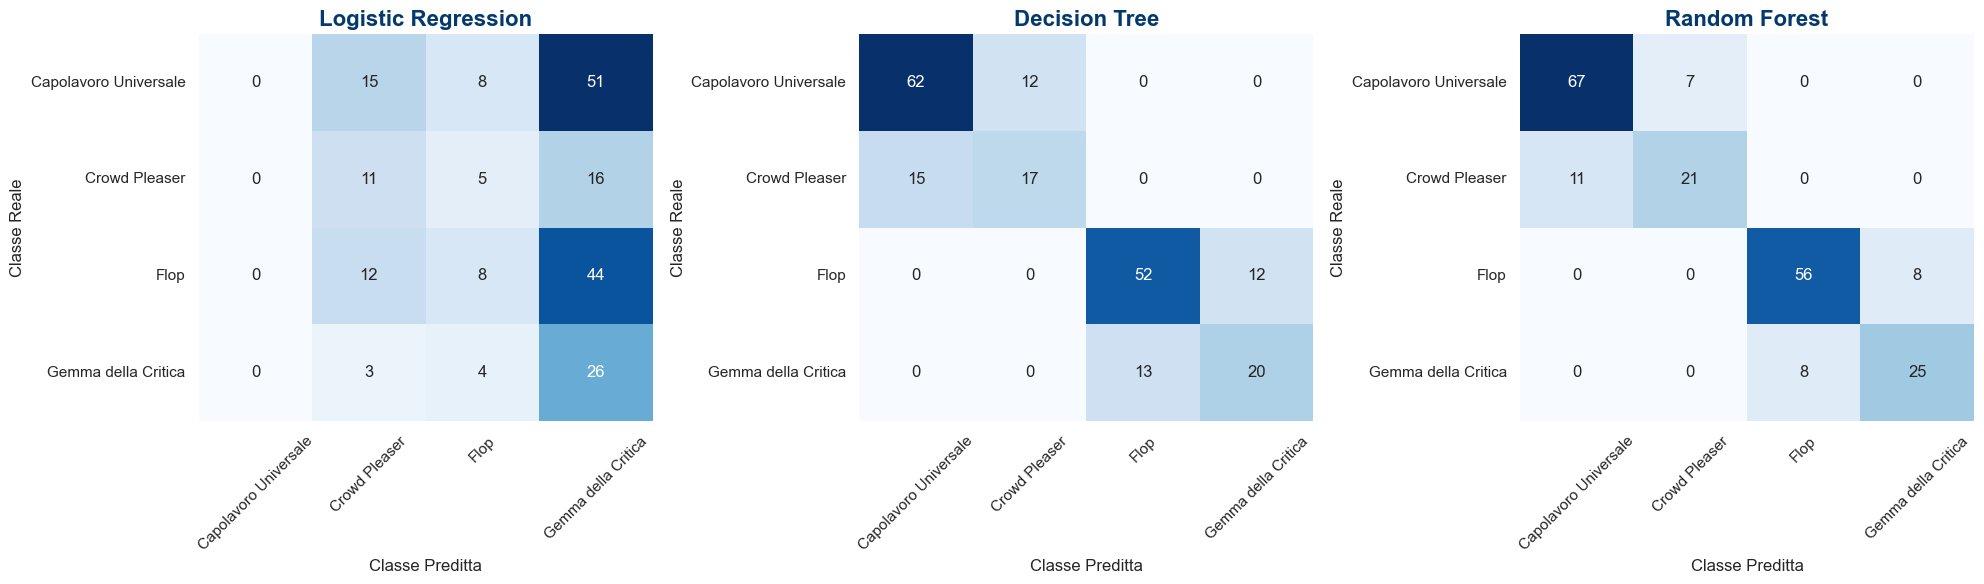

In [21]:
risultati = []
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="white", palette="Blues_r")

print("--- CONFRONTO MODELLI DI MACHINE LEARNING ---\n")

for i, (nome_modello, modello) in enumerate(modelli.items()):
    #addestramenti
    modello.fit(X_train, y_train)

    #predizione
    y_pred= modello.predict(X_test)

    #estrazioni metriche (usiamo "macro" per fare la media equa tra le 4 classi)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    risultati.append({
        'Modello': nome_modello,
        'Accuracy': round(acc, 3),
        'Precision (Macro)': round(prec, 3),
        'Recall (Macro)': round(rec, 3),
        'F1-Score (Macro)': round(f1, 3)
    })

    cm = confusion_matrix(y_test, y_pred, labels=modello.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=modello.classes_, yticklabels=modello.classes_,
                ax=axes[i], cbar=False, annot_kws={"size": 12})

    axes[i].set_title(f'{nome_modello}', fontsize=16, fontweight='bold', color='#03396c')

    axes[i].set_ylabel('Classe Reale', fontsize=12)
    axes[i].set_xlabel('Classe Preditta', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('confronto_matrici_confusione.png', dpi=300)
plt.show()

Tabella riassuntiva

In [22]:
df_risultati = pd.DataFrame(risultati)
df_risultati = df_risultati.sort_values(by='F1-Score (Macro)', ascending=False).reset_index(drop=True)

print("\n--- TABELLA COMPARATIVA DELLE METRICHE ---")
display(df_risultati)


--- TABELLA COMPARATIVA DELLE METRICHE ---


,Modello,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Random Forest,0.833,0.810,0.799,0.804
1,Decision Tree,0.744,0.704,0.697,0.700
2,Logistic Regression,0.222,0.195,0.314,0.197
